In [198]:
import pandas as pd

Our Main Training Set: 

In [199]:
df = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

Let's start with the data processing: 

In [200]:
df = df.drop_duplicates()

In [201]:
dummies = pd.get_dummies(df.Status)
dummies.head()

Saperheated  Subcoled  Subcool  Subcooled  Superheat  Superheated  \
0        False     False    False      False      False         True   
1        False     False    False      False      False         True   
2        False     False    False      False      False         True   
3        False     False    False      False      False         True   
4        False     False    False      False      False         True   

   subcooled  superheated  
0      False        False  
1      False        False  
2      False        False  
3      False        False  
4      False        False

In [202]:
merged = pd.DataFrame(dummies, columns=['Superheated', 'Subcooled'])
merged["Superheated"] = dummies[['Saperheated', 'Superheat', 'superheated', 'Superheated']].any(axis='columns')
merged["Subcooled"] = dummies[['Subcooled', 'Subcoled', 'Subcool', 'subcooled']].any(axis='columns')
merged.head()

Superheated  Subcooled
0         True      False
1         True      False
2         True      False
3         True      False
4         True      False

In [203]:
df = pd.concat([df, merged], axis='columns')
df.drop('Status', axis='columns', inplace=True)

In [204]:
cols = df.columns.tolist()

newCols = cols
newCols[-1], newCols[-2], newCols[-3] = newCols[-3], newCols[-2], newCols[-1]

df = df[newCols]
df.head()

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
0  3203.0                         7.32              0.42            2.42   
1  3204.0                         7.18              0.42            2.39   
2  3205.0                         7.32              0.41            2.39   
3  3206.0                         7.26              0.42            2.40   
4  3207.0                         7.32              0.42            2.40   

   Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0             5.39             1.00              1.79               0.60   
1             5.39             1.01              1.81               0.59   
2             5.38             1.00              1.78               0.62   
3             5.41             1.00              1.81               0.61   
4             5.41             1.02              1.79               0.62   

   Vapour Temperature (K)  Liquid Temperature (K)  ...  \
0                  524.61                  354.49  ...   
1                  522.80                  354.31  ...   
2                  523.00                  354.59  ...   
3                  522.35                  354.37  ...   
4                  522.98                  354.33  ...   

   Liquid Boiling Temperature (K)  Liquid Critical Temperature (K)  Sensor ID  \
0                            -1.0                            152.0       18.0   
1                            -1.0                            152.0       19.0   
2                            -1.0                            152.0       20.0   
3                            -1.0                            152.0       21.0   
4                            -1.0                            152.0       22.0   

   Sensor Position Side  Sensor Position x  Sensor Position y  \
0                   2.0              12.15               7.90   
1                   3.0              12.50              -2.95   
2                   3.0              12.50              -2.95   
3                   3.0              12.50              -2.95   
4                   4.0              12.50              -2.70   

   Sensor Position z  Subcooled  Superheated  Target Pressure (bar)  
0               10.7      False         True               0.199929  
1               -1.9      False         True               0.435681  
2                4.4      False         True               0.264031  
3               10.7      False         True               0.270576  
4               11.0      False         True               0.204675  

[5 rows x 26 columns]

In [205]:
df["Subcooled"] = df["Subcooled"].astype(int)
df["Superheated"] = df["Superheated"].astype(int)
df.head()

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
0  3203.0                         7.32              0.42            2.42   
1  3204.0                         7.18              0.42            2.39   
2  3205.0                         7.32              0.41            2.39   
3  3206.0                         7.26              0.42            2.40   
4  3207.0                         7.32              0.42            2.40   

   Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0             5.39             1.00              1.79               0.60   
1             5.39             1.01              1.81               0.59   
2             5.38             1.00              1.78               0.62   
3             5.41             1.00              1.81               0.61   
4             5.41             1.02              1.79               0.62   

   Vapour Temperature (K)  Liquid Temperature (K)  ...  \
0                  524.61                  354.49  ...   
1                  522.80                  354.31  ...   
2                  523.00                  354.59  ...   
3                  522.35                  354.37  ...   
4                  522.98                  354.33  ...   

   Liquid Boiling Temperature (K)  Liquid Critical Temperature (K)  Sensor ID  \
0                            -1.0                            152.0       18.0   
1                            -1.0                            152.0       19.0   
2                            -1.0                            152.0       20.0   
3                            -1.0                            152.0       21.0   
4                            -1.0                            152.0       22.0   

   Sensor Position Side  Sensor Position x  Sensor Position y  \
0                   2.0              12.15               7.90   
1                   3.0              12.50              -2.95   
2                   3.0              12.50              -2.95   
3                   3.0              12.50              -2.95   
4                   4.0              12.50              -2.70   

   Sensor Position z  Subcooled  Superheated  Target Pressure (bar)  
0               10.7          0            1               0.199929  
1               -1.9          0            1               0.435681  
2                4.4          0            1               0.264031  
3               10.7          0            1               0.270576  
4               11.0          0            1               0.204675  

[5 rows x 26 columns]

In [206]:
#df = df.dropna()
df = df.fillna(df.mean())

df = df.drop("ID", axis='columns')
#df = df.drop("Liquid Boiling Temperature (K)", axis='columns')
#df = df.drop("Sensor ID", axis='columns')
#df = df.drop("Liquid Critical Pressure (bar)", axis='columns')

# BOXPLOT OUTLIER DETECTION #

In [207]:
boxplot = df.boxplot(column=['Vapour Temperature (K)', 'Liquid Temperature (K)'])

In [208]:
df['Tank Failure Pressure (bar)'] = df['Tank Failure Pressure (bar)'].clip(0, 50)
df

Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
0                            7.32              0.42            2.42   
1                            7.18              0.42            2.39   
2                            7.32              0.41            2.39   
3                            7.26              0.42            2.40   
4                            7.32              0.42            2.40   
...                           ...               ...             ...   
9995                        18.09              0.57            2.00   
9996                        18.18              0.57            1.98   
9997                        18.21              0.57            1.98   
9998                        18.41              0.57            1.99   
9999                        18.22              0.57            2.00   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0                5.39             1.00              1.79               0.60   
1                5.39             1.01              1.81               0.59   
2                5.38             1.00              1.78               0.62   
3                5.41             1.00              1.81               0.61   
4                5.41             1.02              1.79               0.62   
...               ...              ...               ...                ...   
9995             7.19             0.98              0.18               0.39   
9996             7.19             0.98              0.22               0.41   
9997             7.19             1.00              0.19               0.39   
9998             7.19             1.01              0.21               0.41   
9999             7.21             1.01              0.21               0.40   

      Vapour Temperature (K)  Liquid Temperature (K)  \
0                     524.61                  354.49   
1                     522.80                  354.31   
2                     523.00                  354.59   
3                     522.35                  354.37   
4                     522.98                  354.33   
...                      ...                     ...   
9995                  540.00                  319.57   
9996                  539.59                  318.92   
9997                  540.22                  319.25   
9998                  539.23                  318.86   
9999                  540.55                  319.72   

      Obstacle Distance to BLEVE (m)  ...  Liquid Boiling Temperature (K)  \
0                               11.0  ...                            -1.0   
1                               11.0  ...                            -1.0   
2                               11.0  ...                            -1.0   
3                               11.0  ...                            -1.0   
4                               11.0  ...                            -1.0   
...                              ...  ...                             ...   
9995                            14.0  ...                            -1.0   
9996                            14.0  ...                            -1.0   
9997                            14.0  ...                            -1.0   
9998                            14.0  ...                            -1.0   
9999                            14.0  ...                            -1.0   

      Liquid Critical Temperature (K)  Sensor ID  Sensor Position Side  \
0                               152.0       18.0                   2.0   
1                               152.0       19.0                   3.0   
2                               152.0       20.0                   3.0   
3                               152.0       21.0                   3.0   
4                               152.0       22.0                   4.0   
...                               ...        ...                   ...   
9995                            152.0       23.0                   4.0   
9996          

In [209]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Actual Test Data, that has no Y values or given target values

testDummies = pd.get_dummies(test_data.Status)
test_data = pd.concat([test_data, testDummies], axis='columns')
test_data.drop('Status', axis='columns', inplace=True)
test_data["Subcooled"] = test_data["Subcooled"].astype(int)
test_data["Superheated"] = test_data["Superheated"].astype(int)
test_data = test_data.dropna()

test_data = test_data.drop("ID", axis='columns')
#test_data = test_data.drop("Liquid Boiling Temperature (K)", axis='columns')
#test_data = test_data.drop("Sensor ID", axis='columns')
#test_data = test_data.drop("Liquid Critical Pressure (bar)", axis='columns')


# CORRELATION HEATMAP #

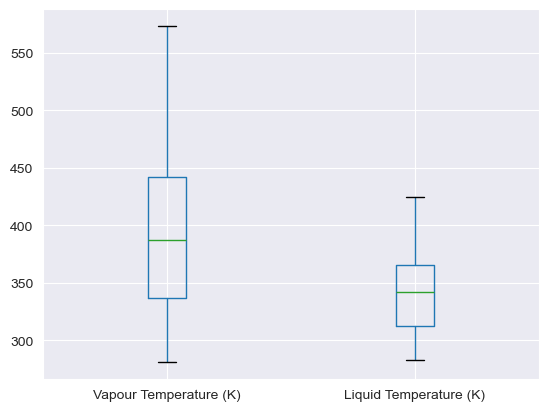

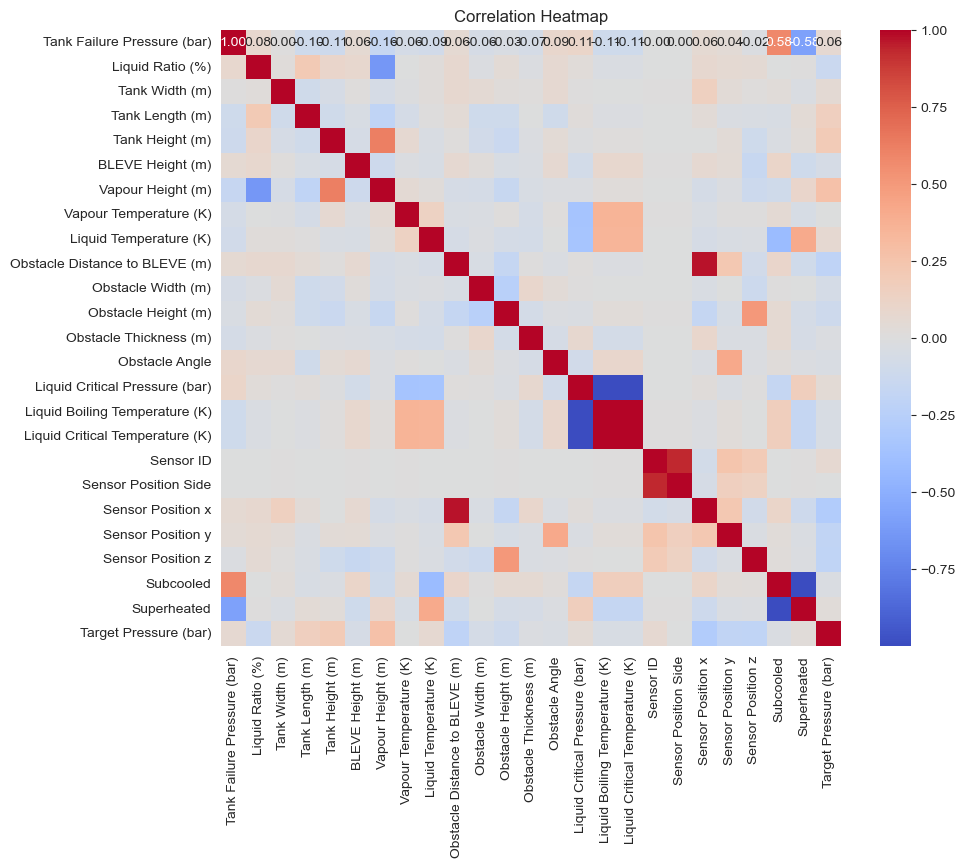

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

display(X)

Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
0                            7.32              0.42            2.42   
1                            7.18              0.42            2.39   
2                            7.32              0.41            2.39   
3                            7.26              0.42            2.40   
4                            7.32              0.42            2.40   
...                           ...               ...             ...   
9995                        18.09              0.57            2.00   
9996                        18.18              0.57            1.98   
9997                        18.21              0.57            1.98   
9998                        18.41              0.57            1.99   
9999                        18.22              0.57            2.00   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0                5.39             1.00              1.79               0.60   
1                5.39             1.01              1.81               0.59   
2                5.38             1.00              1.78               0.62   
3                5.41             1.00              1.81               0.61   
4                5.41             1.02              1.79               0.62   
...               ...              ...               ...                ...   
9995             7.19             0.98              0.18               0.39   
9996             7.19             0.98              0.22               0.41   
9997             7.19             1.00              0.19               0.39   
9998             7.19             1.01              0.21               0.41   
9999             7.21             1.01              0.21               0.40   

      Vapour Temperature (K)  Liquid Temperature (K)  \
0                     524.61                  354.49   
1                     522.80                  354.31   
2                     523.00                  354.59   
3                     522.35                  354.37   
4                     522.98                  354.33   
...                      ...                     ...   
9995                  540.00                  319.57   
9996                  539.59                  318.92   
9997                  540.22                  319.25   
9998                  539.23                  318.86   
9999                  540.55                  319.72   

      Obstacle Distance to BLEVE (m)  ...  Liquid Critical Pressure (bar)  \
0                               11.0  ...                            37.9   
1                               11.0  ...                            37.9   
2                               11.0  ...                            37.9   
3                               11.0  ...                            37.9   
4                               11.0  ...                            37.9   
...                              ...  ...                             ...   
9995                            14.0  ...                            37.9   
9996                            14.0  ...                            37.9   
9997                            14.0  ...                            37.9   
9998                            14.0  ...                            37.9   
9999                            14.0  ...                            37.9   

      Liquid Boiling Temperature (K)  Liquid Critical Temperature (K)  \
0                               -1.0                            152.0   
1                               -1.0                            152.0   
2                               -1.0                            152.0   
3                               -1.0                            152.0   
4                               -1.0                            152.0   
...                              ...                              ...   
9995                            -1.0                            152.0   
9996                  

In [212]:
def formatPredications(predications, fileName):
    output = pd.DataFrame({"ID":test_data.index, "Target Pressure (Bar)":predications})
    output.to_csv(fileName, index=False)

## LINEAR TREE FUNCTION ##

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [213]:
""" FUNCTION IS NOT USED TO PREVENT EXCESSIVE RESOURCE CONSUMPTION"""

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

def linear_train(X_train, Y_train, X_test, Y_test):
    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)

    Y_pred = linear_model.predict(X_test)
    print("MSE: ", mean_squared_error(Y_test, Y_pred))
    print("R^2: ", r2_score(Y_test, Y_pred))

    return linear_model

def linear_predict(X_test, model):
    Y_pred = model.predict(X_test)

    ids = np.arange(len(Y_pred), dtype='int')
    data_to_export_linear = np.vstack((ids, Y_pred)).T
    np.savetxt('testPredicationsLinear.csv', data_to_export_linear, delimiter=',', header="ID, Target Pressure (Bar)", fmt=["%d", '%.16f'], comments='')

    return Y_pred

## DECISION TREE FUNCTION ## 

In [214]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

def tree_train(X_train, y_train):
    tree_model = DecisionTreeRegressor(max_depth=10)
    tree_model.fit(X_train, y_train)
    
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_percentage_error") 
    print("CROSS_VAL: ", scores) 
    
    return tree_model

#model = tree_train(X_train, y_train)

""" TEST DATA PREDICATION """
#testPred = model.predict(X_test)
#score = mean_absolute_percentage_error(y_test, testPred)
#print("TEST:\nMAPE: ", score)
#plot_tree(model)

' TEST DATA PREDICATION '

## RANDOM FORREST FUNCTION ##

In [215]:
from sklearn.ensemble import RandomForestRegressor

def rf_train(X_train, y_train, X_test, y_test):
    rf_classifer = RandomForestRegressor(n_estimators=500, random_state=50, bootstrap=True, max_depth=10)
    rf_classifer.fit(X_train, y_train)
    predictions = rf_classifer.predict(X_test)

    print("MSE: ", mean_squared_error(y_test, predictions))
    print("R^2: ", r2_score(y_test, predictions))
    
    return rf_classifer

def rf_predict(X_test, rf_classifer):
    predictions = rf_classifer.predict(X_test)
    ids = np.arange(len(predictions), dtype='int')
    data_to_export_rf = np.vstack((ids, predictions)).T
    np.savetxt('testPredicationsRF.csv', data_to_export_rf, delimiter=',', header="ID, Target Pressure (Bar)", fmt=["%d", '%.16f'], comments='')


# XGBoost Implementation #

In [ ]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(100, 1000, 100, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),
         #'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse'}

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train, y_train)
    score = -(cross_val_score(model, X, y, scoring="neg_mean_absolute_percentage_error"))
    score = score.max()
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 100, trials=trials)
    return best

trials = Trials()
#best_params = optimize(trials, space)

In [216]:
#best_params = space_eval(space, best_params)
#print(best_params)

In [217]:
""" TEST SET """

#model_final = XGBRegressor(**best_params)
#model_final.fit(X_train, y_train)

#test_predications = model_final.predict(X_test)
#print(mean_absolute_percentage_error(y_test, test_predications))

' TEST SET '

In [218]:
""" KAGGLE SUBMISSION """
#final_predications = model_final.predict(test_data)
#formatPredications(final_predications, "testPredicationsXG.csv")

' KAGGLE SUBMISSION '

## XGBOOST CV ##

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'subsample' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}


model = GridSearchCV(estimator=XGBRegressor(eta=0.001, n_estimators=50000, subsample=0.5, max_depth=9, min_child_weight=3, colsample_bytree=1, reg_alpha=1), param_grid=params, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

print(model.best_params_)

In [ ]:
xgb = XGBRegressor(eta=0.001, max_depth=9, subsample=0.5, n_estimators=50000, min_child_weight=3, colsample_bytree=1, reg_alpha=1)
xgb.fit(X_train, y_train)

test_predications = xgb.predict(X_test)
print(mean_absolute_percentage_error(y_test, test_predications))
score = cross_val_score(xgb, X, y, scoring='neg_mean_absolute_percentage_error')
print(score, score.mean())

In [ ]:
final_predications = xgb.predict(test_data)
formatPredications(final_predications, "testPredicationsXG.csv")

In [ ]:
0.3039
0.3022
0.2913

## NEURAL NETWORK MODEL ##

In [219]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [220]:
input_size = X_train.shape[1]
output_size = 1

print("Feature Size: ", input_size)

Feature Size:  24


In [269]:
class NeuralNetwork(nn.Module):
    
    def __init__(self, h_size_1, h_size_2, h_size_3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, h_size_1),
            nn.ReLU(),
           # nn.Dropout(0.3),
            nn.Linear(h_size_1, h_size_2),
            nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Linear(h_size_2, h_size_3),
            nn.ReLU(),
            nn.Linear(h_size_3, output_size),
        )

    def forward(self, x):
        out = self.layers(x)
        return out


In [222]:
""" Allocating Tensors and utilising CUDA cores"""

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values
X_test = X_test.values
y_test = y_test.values

test_data = test_data.values

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32).to(device)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32).to(device)

test_data_tensor = torch.tensor(test_data, dtype=torch.float32).to(device)


## Cross Fold Validation on Training Data ## 

In [246]:
def model_train(model, train_loader, X_val, y_val, epochs, learning_rate):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate) 
    
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            y_pred = model(inputs) 
            loss = criterion(y_pred, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
    

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

    model.eval()
    with torch.no_grad():
        y_pred = model(X_val)
        score = criterion(y_pred, y_val)
    print("MAE: ", score.item())
    
    return score.item()
        


In [273]:
from hyperopt import hp, fmin, tpe, Trials
from hyperopt import space_eval

def Objective(params):
    epochs = 150
    lr = params['lr']
    h_size_1 = params['h_size_1']
    h_size_2 = params['h_size_2']
    h_size_3 = params['h_size_3']
    batch_size = params['batch_size']    
    
    print("PARAMS: ", params)
    
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
    model = NeuralNetwork(h_size_1, h_size_2, h_size_3)
    model.to(device)

    return model_train(model, train_loader, X_val_tensor, y_val_tensor, epochs, lr)
    
space = {
    'lr' : hp.uniform('lr', 1e-4, 1e-1),
    'h_size_1' : hp.choice('h_size_1', np.arange(10, 20)),
    'h_size_2' : hp.choice('h_size_2', np.arange(10, 20)),
    'h_size_3' : hp.choice('h_size_3', np.arange(10, 20)),
    'batch_size' : hp.choice('batch_size', [128, 256, 512, 1024])
}

trials = Trials()
best = fmin(fn=Objective, space=space, algo=tpe.suggest, max_evals=500, trials=trials)

PARAMS:                                                
{'batch_size': 128, 'h_size_1': 16, 'h_size_2': 13, 'h_size_3': 10, 'lr': 0.017834108697914935}
Epoch [1/150], Loss: 0.2810                            
Epoch [2/150], Loss: 0.2524                            
Epoch [3/150], Loss: 0.2524                            
Epoch [4/150], Loss: 0.2535                            
Epoch [5/150], Loss: 0.2520                            
Epoch [6/150], Loss: 0.2521                            
Epoch [7/150], Loss: 0.2530                            
Epoch [8/150], Loss: 0.2537                            
Epoch [9/150], Loss: 0.2525                            
Epoch [10/150], Loss: 0.2524                           
Epoch [11/150], Loss: 0.2526                           
Epoch [12/150], Loss: 0.2530                           
Epoch [13/150], Loss: 0.2527                           
Epoch [14/150], Loss: 0.2534                           
Epoch [15/150], Loss: 0.2526                           
Epoch [1

In [279]:
print(space_eval(space, best))

{'batch_size': 128, 'h_size_1': 14, 'h_size_2': 16, 'h_size_3': 15, 'lr': 0.004485854433147628}


In [280]:
model = NeuralNetwork(14, 16, 15).to(device)
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
model_train(model, train_loader, X_val_tensor, y_val_tensor, 400, 0.005)

with torch.no_grad():
    predicated_test = model(X_test_tensor)
score = mean_absolute_percentage_error(y_test, predicated_test.cpu().numpy())
print(score)

Epoch [1/400], Loss: 0.3101
Epoch [2/400], Loss: 0.2461
Epoch [3/400], Loss: 0.2369
Epoch [4/400], Loss: 0.2280
Epoch [5/400], Loss: 0.2195
Epoch [6/400], Loss: 0.2127
Epoch [7/400], Loss: 0.1975
Epoch [8/400], Loss: 0.1787
Epoch [9/400], Loss: 0.1608
Epoch [10/400], Loss: 0.1503
Epoch [11/400], Loss: 0.1364
Epoch [12/400], Loss: 0.1367
Epoch [13/400], Loss: 0.1329
Epoch [14/400], Loss: 0.1387
Epoch [15/400], Loss: 0.1399
Epoch [16/400], Loss: 0.1327
Epoch [17/400], Loss: 0.1306
Epoch [18/400], Loss: 0.1174
Epoch [19/400], Loss: 0.1175
Epoch [20/400], Loss: 0.1184
Epoch [21/400], Loss: 0.1128
Epoch [22/400], Loss: 0.1125
Epoch [23/400], Loss: 0.1157
Epoch [24/400], Loss: 0.1160
Epoch [25/400], Loss: 0.1243
Epoch [26/400], Loss: 0.1176
Epoch [27/400], Loss: 0.1097
Epoch [28/400], Loss: 0.1121
Epoch [29/400], Loss: 0.1164
Epoch [30/400], Loss: 0.1115
Epoch [31/400], Loss: 0.1114
Epoch [32/400], Loss: 0.1117
Epoch [33/400], Loss: 0.1081
Epoch [34/400], Loss: 0.1059
Epoch [35/400], Loss: 0

In [258]:
with torch.no_grad():
    final_predications = model(test_data_tensor)

final_predications = (final_predications.cpu().numpy()).squeeze()

df = pd.DataFrame({'Target Pressure (Bar)' : final_predications}, index=range(len(final_predications)))

df.index.name = 'ID'

df.to_csv("testPredicationsNN.csv", index_label='ID')
